<a href="https://colab.research.google.com/github/SPlearning27/DDDS-My-Projects/blob/main/Project-1/Project_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Transaction Data


## Problem Definition
- The primary objective of this project is to develop a predictive model that determines whether a future customer will complete a transaction based on the provided historical data. This is a supervised learning problem, specifically a binary classification program. The model will predict (1)a successful transaction or (0) no transaction.

## Data Collection

In [1]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Pulling data from given Url and put into Dataframe
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv"
transaction_data = pd.read_csv(url)

## Data Cleaning

In [3]:
#Back up Copy of Titanic Dataframe
transaction_data_copy = transaction_data.copy()

In [4]:
# Checking starting shape of starting dataframe
transaction_data.shape

(1050000, 104)

In [5]:
transaction_data.size

109200000

In [6]:
109_200_000

109200000

In [7]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Columns: 104 entries, Unnamed: 0 to var_100
dtypes: float64(102), int64(1), object(1)
memory usage: 833.1+ MB


In [8]:
transaction_data.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# finding sum of NaN/NUll
transaction_data.isna().sum()

,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


In [10]:
#Count the # of NaN and  values for collum target
transaction_data["target"].value_counts(dropna = False)

,count
target,
NaN,870000
0.0,161960
1.0,18040


In [11]:
#count the total of NaN vaules in the dataframe
transaction_data["target"].isna().sum()

np.int64(870000)

In [12]:
# filters out from collum ["target"] NaN values and removes rows with NaN and creates a new dataframe called titanic_data_cleaned
filter = transaction_data["target"].isna()
transaction_data_cleaned = transaction_data[~filter].copy()
transaction_data_cleaned


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
5,5,train_5,0.0,14.6962,18.3383,17.4788,NaN,-9.1355,NaN,NaN,...,NaN,-2.0111,NaN,-3.6166,NaN,NaN,NaN,NaN,NaN,14.4520
11,11,train_11,0.0,4.4949,14.4142,13.2219,NaN,4.9140,NaN,NaN,...,NaN,13.9424,NaN,-15.5776,NaN,NaN,NaN,NaN,NaN,14.1222
15,15,train_15,0.0,4.9657,16.2867,17.9579,NaN,0.6017,NaN,NaN,...,NaN,3.7943,NaN,5.6184,NaN,NaN,NaN,NaN,NaN,14.0619
19,19,train_19,0.0,9.4287,18.7822,10.7630,NaN,-0.7532,NaN,NaN,...,NaN,-5.6677,NaN,-1.8961,NaN,NaN,NaN,NaN,NaN,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,1049990,train_1049990,0.0,7.9632,20.4650,10.7295,NaN,2.9322,NaN,NaN,...,NaN,10.4219,NaN,-19.7158,NaN,NaN,NaN,NaN,NaN,14.0582
1049993,1049993,train_1049993,0.0,5.0862,14.4785,17.3709,NaN,-2.4732,NaN,NaN,...,NaN,-2.8052,NaN,-13.7290,NaN,NaN,NaN,NaN,NaN,14.3794
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689


In [13]:
# Drops column "var_3"
transaction_data_cleaned["var_3"].value_counts(dropna= False)

,count
var_3,
NaN,180000


In [14]:
non = transaction_data_cleaned.isna().sum()
non [non>0]

,0
var_3,180000
var_5,180000
var_6,180000
var_9,180000
var_10,180000
var_11,180000
var_12,180000
var_13,180000
var_16,180000
var_18,180000


In [15]:
transaction_data_cleaned.dropna(axis=1, inplace= True)

In [16]:
transaction_data_cleaned.shape

(180000, 53)

In [17]:
transaction_data_cleaned.isna().sum().sum()

np.int64(0)

In [18]:
transaction_data_cleaned.head().transpose()

,3,5,11,15,19
Unnamed: 0,3,5,11,15,19
ID_code,train_3,train_5,train_11,train_15,train_19
target,0.0,0.0,0.0,0.0,0.0
var_0,4.6739,14.6962,4.4949,4.9657,9.4287
var_1,22.3915,18.3383,14.4142,16.2867,18.7822
var_2,15.6015,17.4788,13.2219,17.9579,10.763
var_4,0.0464,-9.1355,4.914,0.6017,-0.7532
var_7,-1.9254,-6.4882,4.0501,-5.4904,8.8477
var_8,6.476,6.0821,5.8144,6.667,6.8045
var_14,21.6435,11.7476,18.7136,8.1019,19.0069


In [19]:
transaction_data_cleaned["Unnamed: 0"]

,Unnamed: 0
3,3
5,5
11,11
15,15
19,19
...,...
1049990,1049990
1049993,1049993
1049995,1049995
1049997,1049997


In [20]:
transaction_data_cleaned["ID_code"]

,ID_code
3,train_3
5,train_5
11,train_11
15,train_15
19,train_19
...,...
1049990,train_1049990
1049993,train_1049993
1049995,train_1049995
1049997,train_1049997


In [21]:
# Remove column "Unnamed:0"
transaction_data_cleaned.drop(columns= ["Unnamed: 0"], inplace= True)

In [22]:
# Remove column "ID_code"
transaction_data_cleaned.drop(columns= ["ID_code"], inplace= True)

In [23]:
transaction_data_cleaned = transaction_data_cleaned.reset_index(drop=True)

In [24]:
transaction_data_cleaned.shape

(180000, 51)

In [25]:
transaction_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   180000 non-null  float64
 1   var_0    180000 non-null  float64
 2   var_1    180000 non-null  float64
 3   var_2    180000 non-null  float64
 4   var_4    180000 non-null  float64
 5   var_7    180000 non-null  float64
 6   var_8    180000 non-null  float64
 7   var_14   180000 non-null  float64
 8   var_15   180000 non-null  float64
 9   var_17   180000 non-null  float64
 10  var_20   180000 non-null  float64
 11  var_21   180000 non-null  float64
 12  var_22   180000 non-null  float64
 13  var_24   180000 non-null  float64
 14  var_26   180000 non-null  float64
 15  var_27   180000 non-null  float64
 16  var_28   180000 non-null  float64
 17  var_29   180000 non-null  float64
 18  var_36   180000 non-null  float64
 19  var_37   180000 non-null  float64
 20  var_38   180000 non-null  

In [26]:
#  ---- Column Analysis ----
# Print column counts before and after cleaning
print(f"Columns in original dataset: {transaction_data.shape[1]}")
print(f"Columns with NA values dropped: {transaction_data_cleaned.shape[1]}")
print(f"Total columns removed: {transaction_data.shape[1] - transaction_data_cleaned.shape[1]}\n")


# ---- Row Analysis ----
# Print row counts before and after cleaning
print(f"Rows in original dataset: {transaction_data.shape[0]}")
print(f"Rows with NA values dropped: {transaction_data_cleaned.shape[0]}")
print(f"Total rows removed: {transaction_data.shape[0] - transaction_data_cleaned.shape[0]}\n")

# ----File Size Analysis ----
print(f"Original dataset memory usage: ~ {(transaction_data_copy.memory_usage(deep=True).sum())/1048576:.0f} MB")
print(f"Cleaned dataset memory usage: ~ {(transaction_data_cleaned.memory_usage(deep=True).sum())/1048576:.0f} MB")

Columns in original dataset: 104
Columns with NA values dropped: 51
Total columns removed: 53

Rows in original dataset: 1050000
Rows with NA values dropped: 180000
Total rows removed: 870000

Original dataset memory usage: ~ 894 MB
Cleaned dataset memory usage: ~ 70 MB


## Exploratory Data Analysis

In [27]:
transaction_data_cleaned.head()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
0,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
1,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
2,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
3,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
4,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275


In [28]:
transaction_data_cleaned["target"].unique()

array([0., 1.])

In [29]:
transaction_data_cleaned['target'] =  transaction_data_cleaned['target'].astype(np.int8)
transaction_data_cleaned.head()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
0,0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
1,0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
2,0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
3,0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
4,0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275


In [30]:
transaction_data_cleaned.size

9180000

In [31]:
print(transaction_data_cleaned.nunique())

target          2
var_0       89982
var_1       89845
var_2      104710
var_4      119849
var_7      114505
var_8       19006
var_14     127809
var_15      17760
var_17     108599
var_20     130573
var_21     112328
var_22      76198
var_24     107417
var_26      83041
var_27     106142
var_28      83117
var_29      86773
var_36      69951
var_37     108401
var_38     112124
var_39     106000
var_41     127006
var_48     130208
var_49      37907
var_52     137280
var_56       9500
var_57     127689
var_61      18053
var_62      90443
var_63      32995
var_65     129702
var_66     119476
var_67      86228
var_70     118977
var_72     100528
var_73      85501
var_75     125668
var_78     129453
var_80     115230
var_82     103081
var_83      24845
var_84      10512
var_85      48476
var_86     134537
var_87      80967
var_88      57444
var_89      67117
var_92     128142
var_94     131746
var_100      8479
dtype: int64


In [32]:
transaction_data_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,180000.0,0.100222,0.300297,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,180000.0,7.440715,3.021636,-2.6917,5.160325,7.35095,9.511125,16.7165
var_1,180000.0,15.870166,3.010492,6.2993,13.830400,15.93460,18.061425,26.0791
var_2,180000.0,12.735619,4.185923,-1.0185,9.664675,12.67070,15.837300,26.9976
var_4,180000.0,-0.668334,5.968300,-22.7487,-4.997500,-0.56030,3.632525,18.8554
var_7,180000.0,1.190419,5.169343,-15.1940,-2.571400,1.19460,5.090450,18.4714
var_8,180000.0,6.813431,0.375564,5.3593,6.544100,6.80680,7.070900,8.3091
var_14,180000.0,11.946357,7.364523,-19.5443,6.756875,11.92530,17.039600,39.3968
var_15,180000.0,2.963064,0.369891,1.8512,2.698400,2.95990,3.241425,4.2204
var_17,180000.0,8.528080,4.641700,-6.0111,5.065750,8.59920,12.273300,22.3315


In [33]:
transaction_success = transaction_data_cleaned[transaction_data_cleaned['target']== 1].copy()
transaction_success.shape

(18040, 51)

In [34]:
transaction_fail = transaction_data_cleaned[transaction_data_cleaned['target']== 0].copy()
transaction_fail.shape

(161960, 51)

In [35]:
predictor_df = transaction_data_cleaned.drop('target', axis = 1, inplace = False)

In [36]:
target_df  = transaction_data_cleaned.iloc[:,0:1].copy()

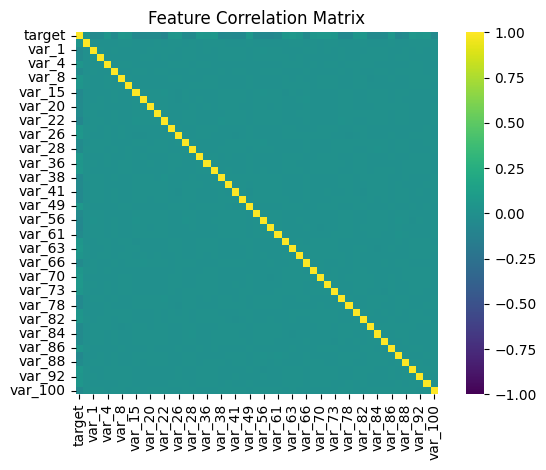

In [37]:
foo = transaction_data_cleaned.corr()
sns.heatmap(foo, cmap='viridis',vmin = -1, square=True)
plt.title('Feature Correlation Matrix');
plt.tight_layout();
plt.savefig('transaction_correlation_matrix.png',dpi = 300);
plt.show();

<Figure size 640x480 with 0 Axes>

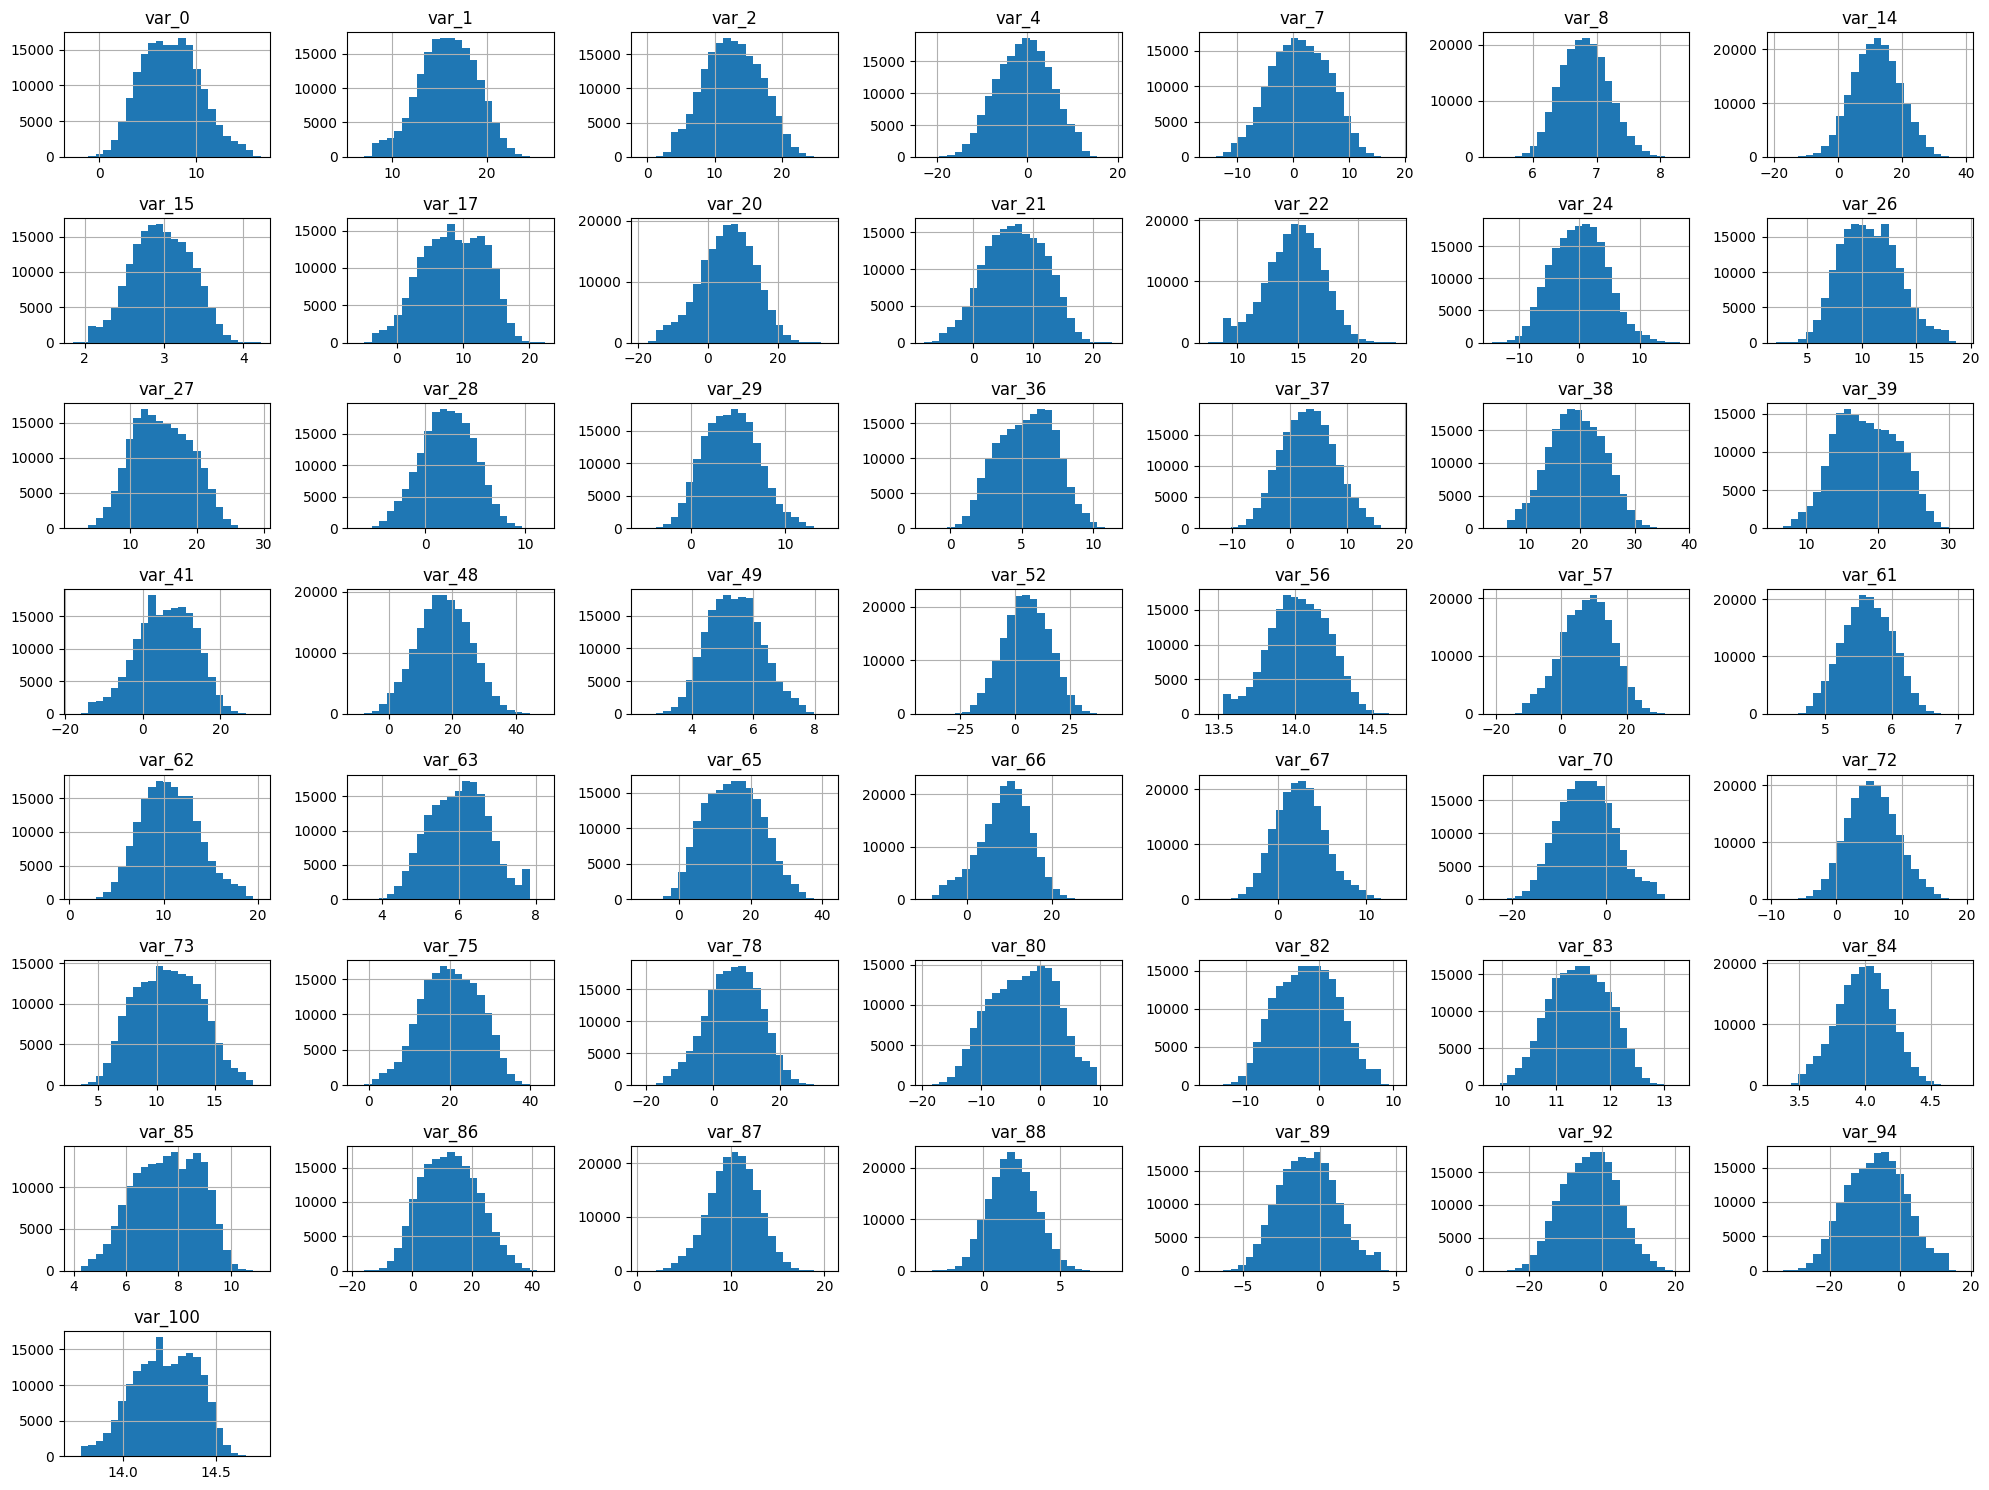

In [38]:
plt.figure();
predictor_df.hist(bins=25, figsize=(20, 15));
plt.tight_layout();
plt.savefig('preditor_hist.png');
plt.show();

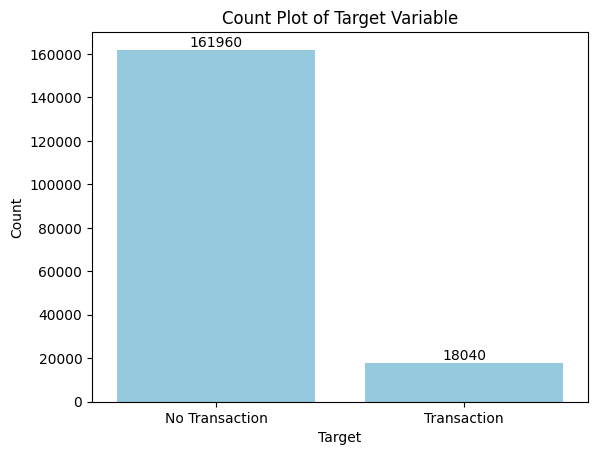

In [39]:
foo = sns.countplot(data= target_df,x = 'target',color='skyblue');
foo.bar_label(foo.containers[0])
plt.title('Count Plot of Target Variable');
plt.xticks([0, 1], ['No Transaction', 'Transaction'])
plt.xlabel('Target')
plt.ylabel("Count")
plt.savefig('target_countplot.png');
plt.show();

In [40]:
target_dif = (target_df == False).sum() - (target_df == True).sum()
target_dif

,0
target,143920


## Data Processing

In [41]:
gnb = GaussianNB()

In [42]:
y = transaction_data_cleaned['target'].copy()
X = predictor_df

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0);
gnb.fit(X_train, y_train);
y_pred = gnb.predict(X_test);


In [44]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [45]:
accuracy_scores = cross_validate(X, y, 100)
cv_accuracy = accuracy_scores.mean()

In [46]:
np.set_printoptions(precision=5, suppress=True)
print("="*80)
print(f"Cross-validation Results:")
print("="*80)
print(f"Mean accuracy:     {cv_accuracy:.5f}")
print(f"Std deviation:    ±{accuracy_scores.std():.5f}")
print(f"\nIndividual scores: {accuracy_scores}")
print("="*80)

Cross-validation Results:
Mean accuracy:     0.91102
Std deviation:    ±0.00113

Individual scores: [0.9105  0.91144 0.9105  0.91072 0.91094 0.91019 0.91131 0.91147 0.90983
 0.91208 0.91028 0.91111 0.91158 0.90961 0.91106 0.911   0.91269 0.9095
 0.91103 0.91133 0.91267 0.91083 0.91111 0.90925 0.91103 0.91414 0.90989
 0.91269 0.91092 0.91189 0.91122 0.91172 0.91122 0.91183 0.91036 0.91261
 0.91103 0.90906 0.91108 0.91178 0.9105  0.90967 0.90844 0.91097 0.91142
 0.91133 0.91178 0.91147 0.91022 0.90972 0.90983 0.9135  0.909   0.91036
 0.91164 0.90983 0.91006 0.91097 0.91022 0.90967 0.91119 0.91081 0.91092
 0.91156 0.91053 0.91069 0.91133 0.91242 0.91044 0.90972 0.91197 0.90903
 0.90997 0.90997 0.91086 0.90975 0.91172 0.90883 0.90936 0.91228 0.9125
 0.91242 0.91142 0.91167 0.91333 0.91025 0.91347 0.91106 0.91125 0.91253
 0.91106 0.91333 0.91333 0.90989 0.91217 0.91133 0.9105  0.91139 0.91028
 0.91042]


In [47]:
report = classification_report(y_test, y_pred)
print("="*80)
print(f"Classification Report Results:")
print("="*80)
print(report)

Classification Report Results:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32383
           1       0.67      0.23      0.34      3617

    accuracy                           0.91     36000
   macro avg       0.79      0.61      0.64     36000
weighted avg       0.89      0.91      0.89     36000



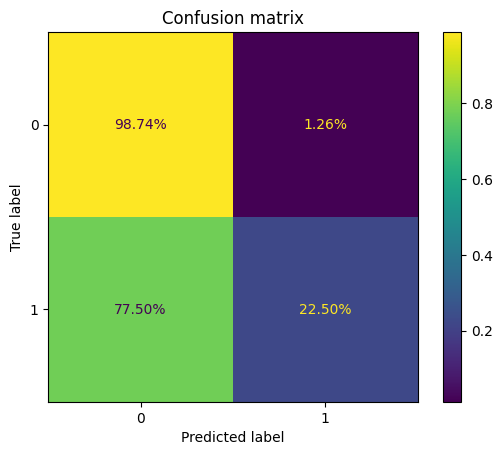

In [48]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap='viridis',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')
plt.show();

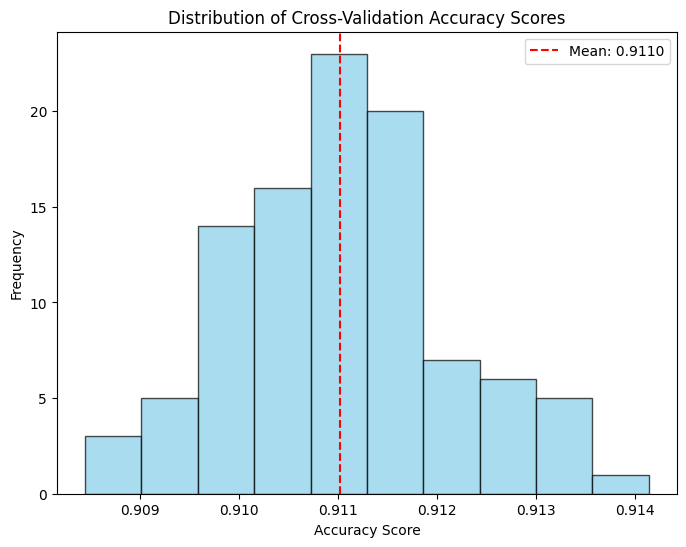

In [49]:
# step 16
plt.figure(figsize=(8, 6))
plt.hist(accuracy_scores, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Cross-Validation Accuracy Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.axvline(cv_accuracy, color='red', linestyle='--', label=f'Mean: {cv_accuracy:.4f}')
plt.legend();
plt.savefig('cross_validation_distribution_accuracy_scores.png');
plt.show();


In [50]:
transaction_fail_50 = transaction_fail.sample(n=18040)
transaction_success_fail_50_50 = pd.concat([transaction_fail_50,transaction_success], ignore_index=True)

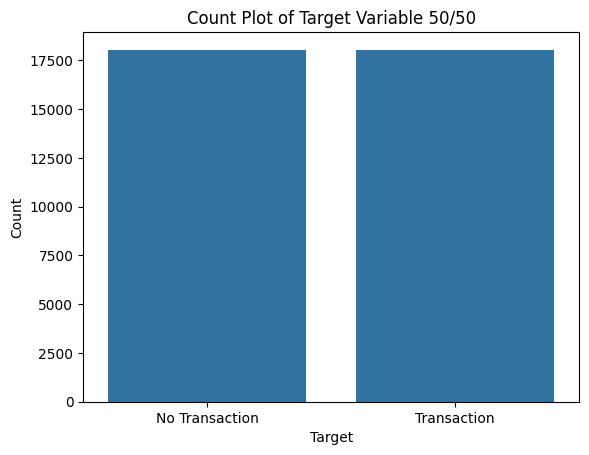

In [51]:
foo = sns.countplot(data= transaction_success_fail_50_50,x = 'target');
plt.title('Count Plot of Target Variable 50/50');
plt.xticks([0, 1], ['No Transaction', 'Transaction'])
plt.xlabel('Target')
plt.ylabel("Count")
plt.savefig('target_countplot_50_50.png');
plt.show();


In [52]:
y2 = transaction_success_fail_50_50['target'].copy()
X2 = transaction_success_fail_50_50.drop('target', axis = 1, inplace = False)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20, random_state=0);
gnb.fit(X_train, y_train);
y_pred = gnb.predict(X_test);


In [54]:
accuracy_scores = cross_validate(X2, y2, 100)
cv_accuracy = accuracy_scores.mean()


In [55]:
np.set_printoptions(precision=5, suppress=True)
print("="*80)
print(f"Cross-validation Results :")
print("="*80)
print(f"Mean accuracy:     {cv_accuracy:.5f}")
print(f"Std deviation:    ±{accuracy_scores.std():.5f}")
print(f"\nIndividual scores: {accuracy_scores}")
print("="*80)

Cross-validation Results :
Mean accuracy:     0.75503
Std deviation:    ±0.00468

Individual scores: [0.75388 0.74584 0.75333 0.74834 0.75319 0.75707 0.7464  0.75319 0.75637
 0.75055 0.75485 0.7615  0.75236 0.75263 0.7536  0.74432 0.7543  0.75998
 0.75291 0.75083 0.75887 0.76109 0.75818 0.75249 0.75776 0.75679 0.75762
 0.75263 0.7543  0.75928 0.76233 0.74986 0.7622  0.75457 0.76109 0.75527
 0.75333 0.75748 0.75416 0.76303 0.75291 0.75707 0.75097 0.74903 0.75097
 0.75305 0.7464  0.75374 0.7597  0.7597  0.76483 0.74667 0.75915 0.75152
 0.75845 0.74861 0.75651 0.75249 0.75776 0.75291 0.7615  0.75901 0.75263
 0.75915 0.75291 0.7464  0.75291 0.7597  0.75111 0.74376 0.75416 0.75125
 0.75901 0.7543  0.75776 0.75305 0.75291 0.7554  0.76136 0.76123 0.76317
 0.75527 0.75998 0.75901 0.75069 0.75374 0.75055 0.76109 0.76483 0.75901
 0.75485 0.75208 0.75471 0.75901 0.74667 0.76136 0.75111 0.7536  0.75457
 0.75818]


In [56]:
report = classification_report(y_test, y_pred)
print("="*80)
print(f"Classification Report Results with 50/50 target:")
print("="*80)
print(report)

Classification Report Results with 50/50 target:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3599
           1       0.76      0.74      0.75      3617

    accuracy                           0.75      7216
   macro avg       0.75      0.75      0.75      7216
weighted avg       0.75      0.75      0.75      7216



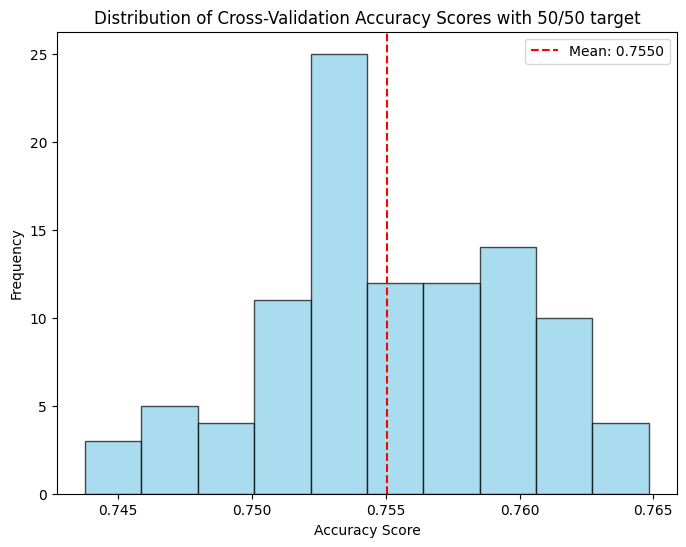

In [57]:
plt.figure(figsize=(8, 6))
plt.hist(accuracy_scores, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Cross-Validation Accuracy Scores with 50/50 target')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.axvline(cv_accuracy, color='red', linestyle='--', label=f'Mean: {cv_accuracy:.4f}')
plt.legend()
plt.savefig('cross_validation_distribution_accuracy_scores_50_50.png')
plt.show()


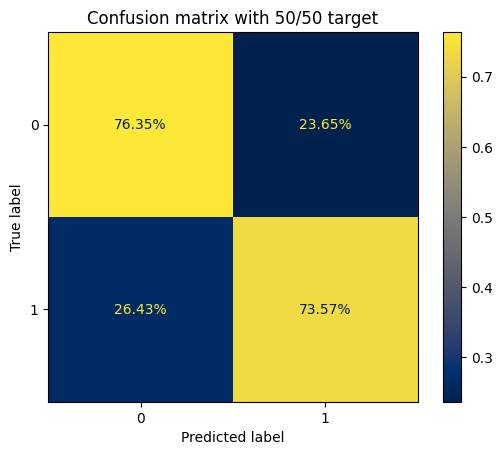

In [58]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'cividis',
    )
plt.grid(False)
plt.title('Confusion matrix with 50/50 target') ;
plt.savefig('confusion_matrix_50_50.png')
plt.show();

## Communication of Results/ Visualizations


### Model Performace - unbalanced Dataset


- Having the predictor Variables in a normal distribution allowed us to use Guassian Navie Bayes
- Guassian Navie Bayes resulted in an accuaracy of 91% but leading towards finding Non-Transactions
- The Correlation matrix was only able to find true positive (transactions) ~23% of the time


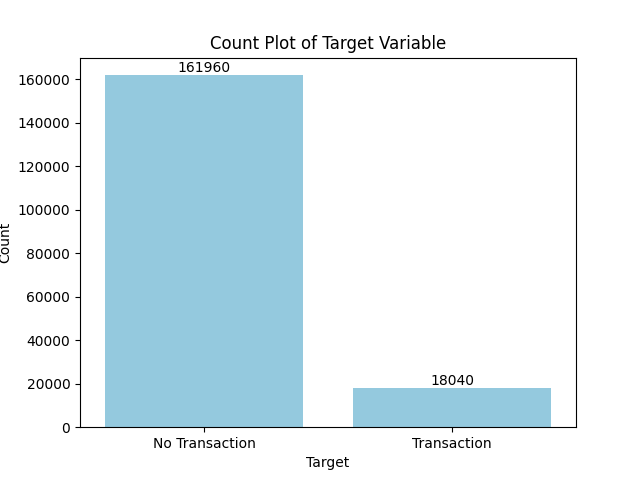


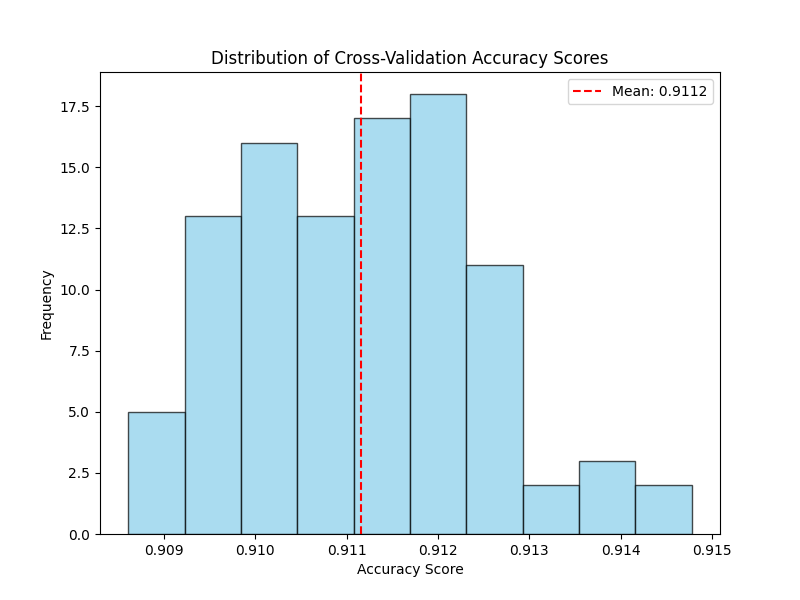
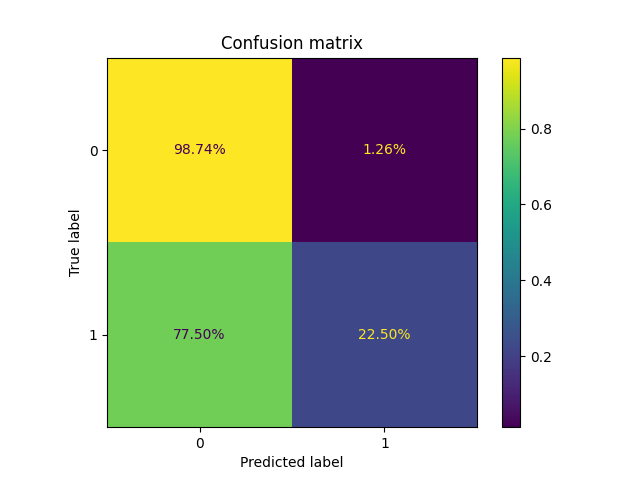


-


### Model Performance - Balanced Dataset

- Model when balanced with equal ammounts of 0 or 1 transactions resulted in better model.
- Accuracy was decreased to ~76%, a more realistic reflection of its performance.
- Recall Success was increased to ~75%
  - Showing a greater chance of actually predicting if a customer would make a transaction.


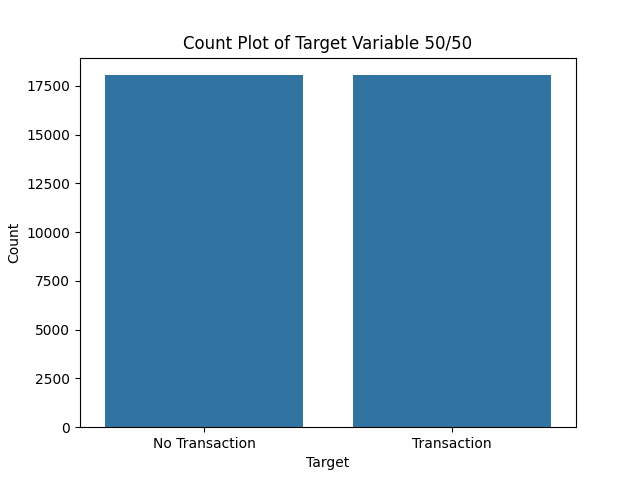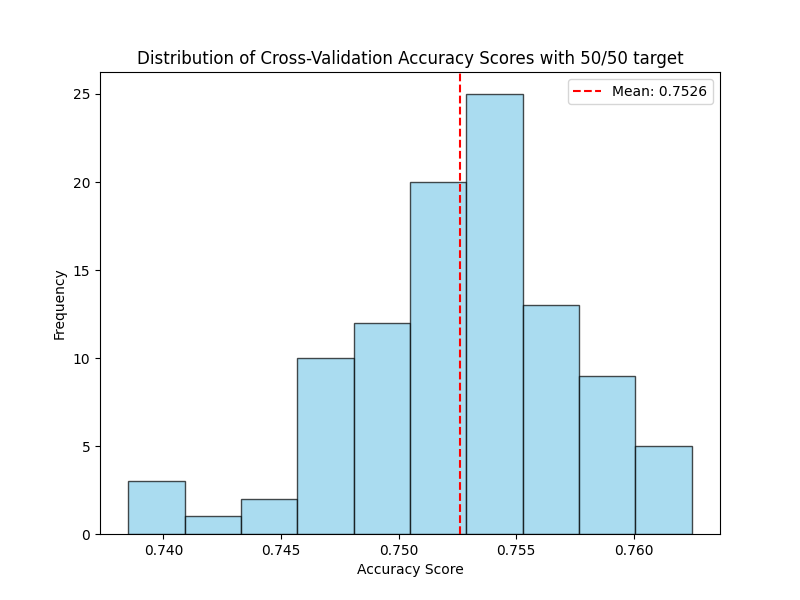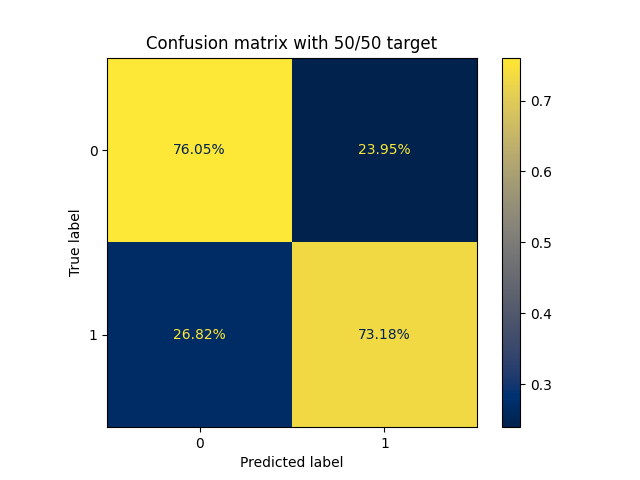

### Future exploration / Next Steps
- It would be good to look into alertantive models and see how they do compared to GNB.
-  Finding out what datapoints where of use could yield improved data collection and reduce time spent on collected data points we ended up dropping.

## Citations/References
- Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585(7825), 357-362. https://doi.org/10.1038/s41586-020-2649-2

- Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/MCSE.2007.55

- McKinney, W. (2010). Data structures for statistical computing in Python. Proceedings of the 9th Python in Science Conference, 56-61. https://doi.org/10.25080/Majora-92bf1922-00a

- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

- Waskom, M. L. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://doi.org/10.21105/joss.03021

- Source Data - https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv
